## 梯度下降(Gradient Descent)


In [14]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [15]:
# 目標函數:y=x^2
def func(x): return np.square(x) 

# 目標函數一階導數:dy/dx=2*x
def dfunc(x): return 2 * x 

def GD(x_start, df, epochs, lr):    
    """  梯度下降法。給定起始點與目標函數的一階導函數，求在epochs次反覆運算中x的更新值
        :param x_start: x的起始點    
        :param df: 目標函數的一階導函數    
        :param epochs: 反覆運算週期    
        :param lr: 學習率    
        :return: x在每次反覆運算後的位置（包括起始點），長度為epochs+1    
     """    
    xs = np.zeros(epochs+1)    
    x = x_start    
    xs[0] = x    
    for i in range(epochs):         
        dx = df(x)        
        # v表示x要改變的幅度        
        v = - dx * lr        
        x += v        
        xs[i+1] = x    
    return xs

# Main
# 起始權重
x_start = 5    
# 執行週期數
epochs = 15 
# 學習率   
lr = 0.3   
# 梯度下降法 
# *** Function 可以直接當參數傳遞 ***
x = GD(x_start, dfunc, epochs, lr=lr) 
print (x)



[5.00000000e+00 2.00000000e+00 8.00000000e-01 3.20000000e-01
 1.28000000e-01 5.12000000e-02 2.04800000e-02 8.19200000e-03
 3.27680000e-03 1.31072000e-03 5.24288000e-04 2.09715200e-04
 8.38860800e-05 3.35544320e-05 1.34217728e-05 5.36870912e-06]


## 梯度下降示意圖：找每一點的切線(tangent line)：取相近兩個點求斜率，畫切線

### 斜率公式如下：
### $\begin{equation}slope = \frac{\Delta{y}}{\Delta{x}} = \frac{y_{2} - y_{1}}{x_{2} - x_{1}}\end{equation}$


 
10 x - 25.01
 
8.001 x - 16
 
6.001 x - 9.003
 
4.001 x - 4.002
 
2.001 x - 1.001
 
0.001 x


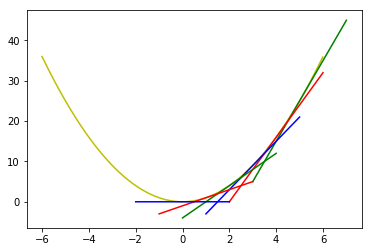

In [16]:
color = list('rgbrgb')    
#plt.plot(line_x, line_y, c='b')    
from numpy import arange
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='y')

line_offset=2 #切線長度
for i in range(5, -1, -1):
    # 取相近兩個點，畫切線(tangent line)
    z=np.array([i+0.001, i])
    vec=np.vectorize(func)
    cls = np.polyfit(z, vec(z), deg=1)
    p = np.poly1d(cls)
    print(p)
    
    x2=np.array([i+line_offset, i-line_offset])
    y=np.array([(i+line_offset)*p[1]+p[0], (i-line_offset)*p[1]+p[0]])
    plt.plot(x2, y, c=color[i-1])    
#plt.scatter(x, func(x), c=color, )    
#plt.legend()

plt.show()


## 梯度下降作圖

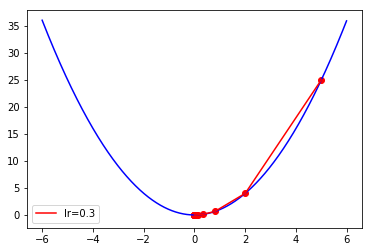

In [17]:
color = 'r'    
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c=color, label='lr={}'.format(lr))    
plt.scatter(x, func(x), c=color, )    
plt.legend()

plt.show()
